In [13]:
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.cluster import MeanShift, KMeans

## Loading Dataset

In [2]:
fires = pd.read_csv("./oct/fire_nrt_V1_26765.csv")
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 14 columns):
latitude      1905 non-null float64
longitude     1905 non-null float64
bright_ti4    1905 non-null float64
scan          1905 non-null float64
track         1905 non-null float64
acq_date      1905 non-null object
acq_time      1905 non-null int64
satellite     1905 non-null object
instrument    1905 non-null object
confidence    1905 non-null object
version       1905 non-null object
bright_ti5    1905 non-null float64
frp           1905 non-null float64
daynight      1905 non-null object
dtypes: float64(7), int64(1), object(6)
memory usage: 208.4+ KB


### Select features

In [3]:
FEATURE_NAMES = [
    "latitude",
    "longitude"
]

X = fires[FEATURE_NAMES]

In [4]:
X.head()

,latitude,longitude
0,42.64241,22.95799
1,42.86904,22.96317
2,42.71485,24.17236
3,42.71452,24.17006
4,43.76098,23.68114


## Evaluating Clustering Methods

In [5]:
def plot(centroids, labels):
    sns.scatterplot(X["latitude"], X["longitude"], hue=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=300, c="yellow")

### Mean Shift

In [6]:
mean_shift = MeanShift(n_jobs=-1)

In [7]:
mean_shift.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=-1, seeds=None)

In [8]:
mean_shift.cluster_centers_

array([[43.49623613, 23.96464083],
       [43.75988124, 27.56858341]])

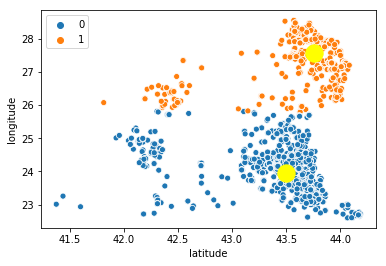

In [9]:
plot(mean_shift.cluster_centers_, mean_shift.labels_)

### K-Means

In [10]:
k_means = KMeans(n_clusters=6, init="random", n_init=1000, max_iter=10_000, n_jobs=-1)

In [11]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=10000,
    n_clusters=6, n_init=1000, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

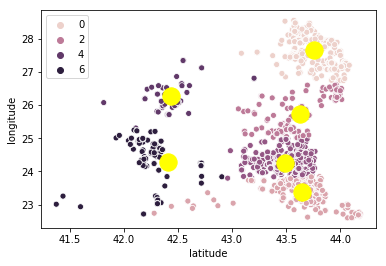

In [12]:
plot(k_means.cluster_centers_, k_means.labels_)

# Saving model

In [14]:
with open("./fire_clustering.b", "wb") as f:
    pickle.dump(k_means, f)